# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the Dataset

In [3]:
# Load the dataset

df = pd.read_csv('train_data_cleaned.csv')
df.head()

,date,store_nbr,family,sales,onpromotion,city,type_of_store,cluster,dcoilwtico,transactions,n_holidays
0,2013-01-01,1,Others,0.0,0,Quito,D,13,93.14,NaN,1.0
1,2013-01-01,1,Others,0.0,0,Quito,D,13,93.14,NaN,1.0
2,2013-01-01,1,Others,0.0,0,Quito,D,13,93.14,NaN,1.0
3,2013-01-01,1,BEVERAGES,0.0,0,Quito,D,13,93.14,NaN,1.0
4,2013-01-01,1,Others,0.0,0,Quito,D,13,93.14,NaN,1.0


In [4]:
df.tail()

,date,store_nbr,family,sales,onpromotion,city,type_of_store,cluster,dcoilwtico,transactions,n_holidays
3000883,2017-08-15,9,POULTRY,438.133,0,Quito,B,6,47.57,2155.0,1.0
3000884,2017-08-15,9,Others,154.553,1,Quito,B,6,47.57,2155.0,1.0
3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,B,6,47.57,2155.0,1.0
3000886,2017-08-15,9,Others,121.000,8,Quito,B,6,47.57,2155.0,1.0
3000887,2017-08-15,9,Others,16.000,0,Quito,B,6,47.57,2155.0,1.0


# Data Exploration

In [6]:
#Check the shape, columns, and data types
df.shape, df.columns, df.info()

# Basic summary statistics
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000888 entries, 0 to 3000887
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   date           object 
 1   store_nbr      int64  
 2   family         object 
 3   sales          float64
 4   onpromotion    int64  
 5   city           object 
 6   type_of_store  object 
 7   cluster        int64  
 8   dcoilwtico     float64
 9   transactions   float64
 10  n_holidays     float64
dtypes: float64(4), int64(3), object(4)
memory usage: 251.8+ MB


,store_nbr,sales,onpromotion,cluster,dcoilwtico,transactions,n_holidays
count,3.000888e+06,3.000888e+06,3.000888e+06,3.000888e+06,2.143746e+06,2.755104e+06,3.000888e+06
mean,2.750000e+01,3.577757e+02,2.602770e+00,8.481481e+00,6.788783e+01,1.694602e+03,1.662708e-01
std,1.558579e+01,1.101998e+03,1.221888e+01,4.649735e+00,2.566954e+01,9.632810e+02,4.202733e-01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.619000e+01,5.000000e+00,0.000000e+00
25%,1.400000e+01,0.000000e+00,0.000000e+00,4.000000e+00,4.640000e+01,1.046000e+03,0.000000e+00
50%,2.750000e+01,1.100000e+01,0.000000e+00,8.500000e+00,5.330000e+01,1.393000e+03,0.000000e+00
75%,4.100000e+01,1.958473e+02,0.000000e+00,1.300000e+01,9.578000e+01,2.079000e+03,0.000000e+00
max,5.400000e+01,1.247170e+05,7.410000e+02,1.700000e+01,1.106200e+02,8.359000e+03,3.000000e+00


# Data Preprocessing

In [8]:
# Check for missing values
df.isnull().sum()

#Fill or drop missing values
df.fillna(0, inplace =True)

#Convert date column to datetime if necessary
df['date']=pd.to_datetime(df['date'])

#Feature Engineering:
#Extracting month, day, adn year from the date
df['Month']=df['date'].dt.month
df['Year'] = df['date'].dt.year
df['Day'] = df['date'].dt.day

# Checking Missing Values

In [10]:
# Checking Missing values
print(df.isnull().sum())

#check if there are any missing values in the entire dataset
print(df.isnull().any().any())

date             0
store_nbr        0
family           0
sales            0
onpromotion      0
city             0
type_of_store    0
cluster          0
dcoilwtico       0
transactions     0
n_holidays       0
Month            0
Year             0
Day              0
dtype: int64
False


# Checking Data Types

In [12]:
#check data types of all columns
print(df.dtypes)

#Focus on specific columns (e.g., Date column)
print(type(df['date'][0]))

date             datetime64[ns]
store_nbr                 int64
family                   object
sales                   float64
onpromotion               int64
city                     object
type_of_store            object
cluster                   int64
dcoilwtico              float64
transactions            float64
n_holidays              float64
Month                     int32
Year                      int32
Day                       int32
dtype: object
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


# Feature Engineering

In [14]:
#Display the first few rows to check new columns
print(df.head())

#check specific columns
print(df[['Year', 'Month', 'Day']].head())

        date  store_nbr     family  sales  onpromotion   city type_of_store  \
0 2013-01-01          1     Others    0.0            0  Quito             D   
1 2013-01-01          1     Others    0.0            0  Quito             D   
2 2013-01-01          1     Others    0.0            0  Quito             D   
3 2013-01-01          1  BEVERAGES    0.0            0  Quito             D   
4 2013-01-01          1     Others    0.0            0  Quito             D   

   cluster  dcoilwtico  transactions  n_holidays  Month  Year  Day  
0       13       93.14           0.0         1.0      1  2013    1  
1       13       93.14           0.0         1.0      1  2013    1  
2       13       93.14           0.0         1.0      1  2013    1  
3       13       93.14           0.0         1.0      1  2013    1  
4       13       93.14           0.0         1.0      1  2013    1  
   Year  Month  Day
0  2013      1    1
1  2013      1    1
2  2013      1    1
3  2013      1    1
4  2013    

# Checking duplicates

In [16]:
#Count rows before amd after 
print(f'Rows before: {len(df)}')
df=df.drop_duplicates()
print(f'Rows after: {len(df)}')

Rows before: 3000888
Rows after: 2075577


# Viewing the Entire Dataset

In [18]:
#View the first few rows
print(df.head())

#View the shape of the dataset
print(df.shape)

#check all coumn names
print(df.columns)

        date  store_nbr        family  sales  onpromotion   city  \
0 2013-01-01          1        Others    0.0            0  Quito   
3 2013-01-01          1     BEVERAGES    0.0            0  Quito   
5 2013-01-01          1  BREAD/BAKERY    0.0            0  Quito   
7 2013-01-01          1      CLEANING    0.0            0  Quito   
8 2013-01-01          1         DAIRY    0.0            0  Quito   

  type_of_store  cluster  dcoilwtico  transactions  n_holidays  Month  Year  \
0             D       13       93.14           0.0         1.0      1  2013   
3             D       13       93.14           0.0         1.0      1  2013   
5             D       13       93.14           0.0         1.0      1  2013   
7             D       13       93.14           0.0         1.0      1  2013   
8             D       13       93.14           0.0         1.0      1  2013   

   Day  
0    1  
3    1  
5    1  
7    1  
8    1  
(2075577, 14)
Index(['date', 'store_nbr', 'family', 'sales', '

# Data Visualization

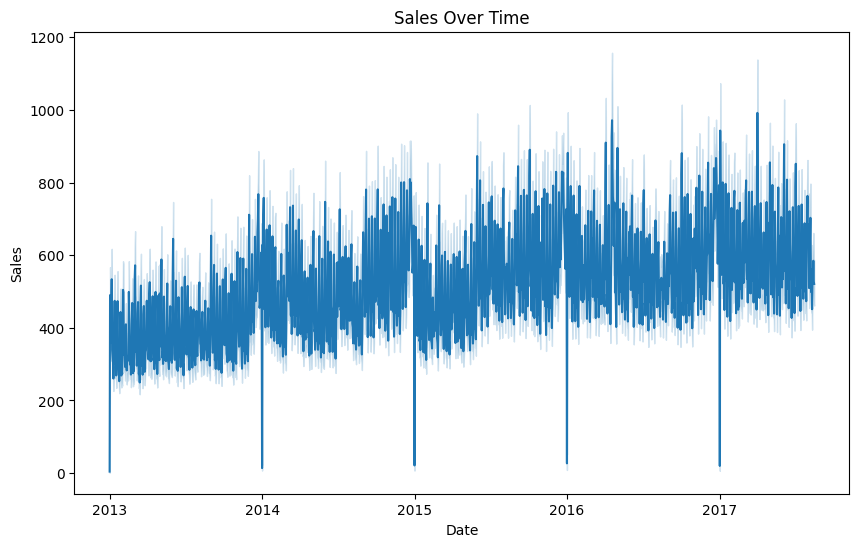

In [20]:
#Sales Over Time(Line Plot)

plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='sales', data=df)
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

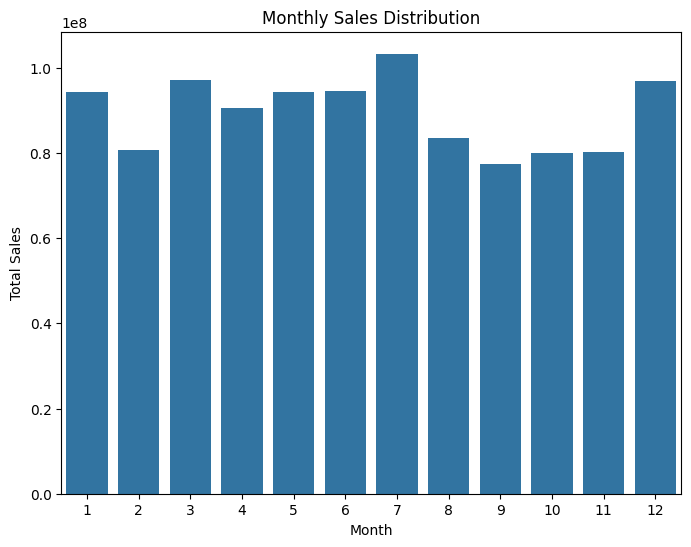

In [21]:
# Bar Plot
monthly_sales = df.groupby('Month')['sales'].sum().reset_index()

plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='sales', data = monthly_sales)
plt.title('Monthly Sales Distribution')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

In [22]:
print(df.columns)

Index(['date', 'store_nbr', 'family', 'sales', 'onpromotion', 'city',
       'type_of_store', 'cluster', 'dcoilwtico', 'transactions', 'n_holidays',
       'Month', 'Year', 'Day'],
      dtype='object')


In [23]:
print(df.dtypes)

date             datetime64[ns]
store_nbr                 int64
family                   object
sales                   float64
onpromotion               int64
city                     object
type_of_store            object
cluster                   int64
dcoilwtico              float64
transactions            float64
n_holidays              float64
Month                     int32
Year                      int32
Day                       int32
dtype: object


In [24]:
for column in df.select_dtypes(include=['object']):
    print(f'Unique values in {column}:{df[column].unique()}')

Unique values in family:['Others' 'BEVERAGES' 'BREAD/BAKERY' 'CLEANING' 'DAIRY' 'DELI' 'GROCERY I'
 'MEATS' 'PERSONAL CARE' 'POULTRY' 'PRODUCE']
Unique values in city:['Quito' 'Cayambe' 'Latacunga' 'Riobamba' 'Ibarra' 'Santo Domingo'
 'Guaranda' 'Puyo' 'Ambato' 'Guayaquil' 'Salinas' 'Daule' 'Babahoyo'
 'Quevedo' 'Playas' 'Libertad' 'Cuenca' 'Loja' 'Machala' 'Esmeraldas'
 'Manta' 'El Carmen']
Unique values in type_of_store:['D' 'C' 'B' 'E' 'A']


In [25]:
for column in df.columns:
    df[column] = pd.to_numeric(df[column], errors = 'coerce')

In [26]:
df = df.fillna(0)

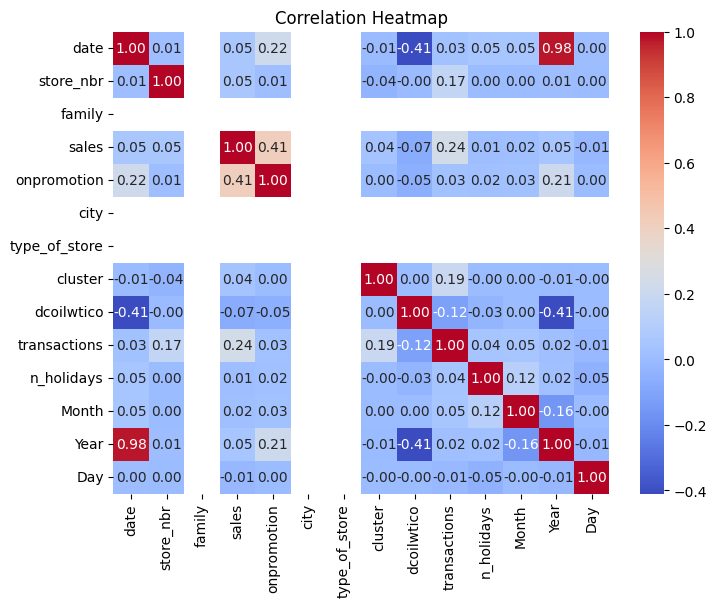

In [27]:
corr_matrix = df.select_dtypes(include=['number']).corr()

#Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

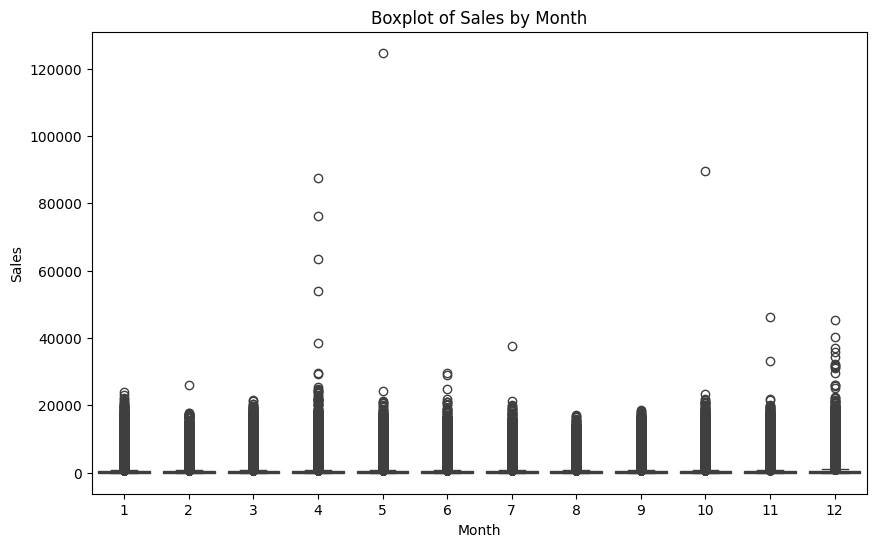

In [28]:
#Boxplot of Sales by Month

plt.figure(figsize=(10, 6))
sns.boxplot(x='Month', y='sales', data=df)
plt.title('Boxplot of Sales by Month')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

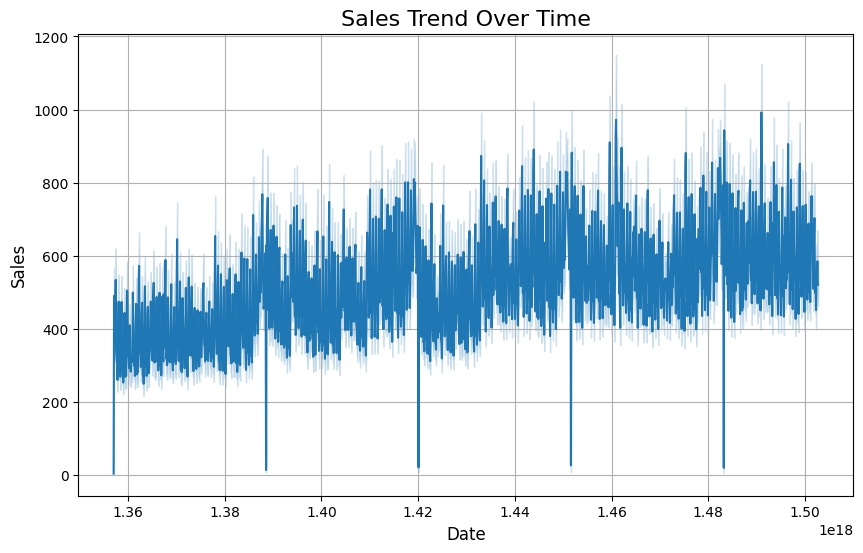

In [29]:
#Times Series Sales Trend
plt.figure(figsize=(10, 6))
sns.lineplot(x='date', y='sales', data=df)
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Sales', fontsize=12)
plt.grid()
plt.show()

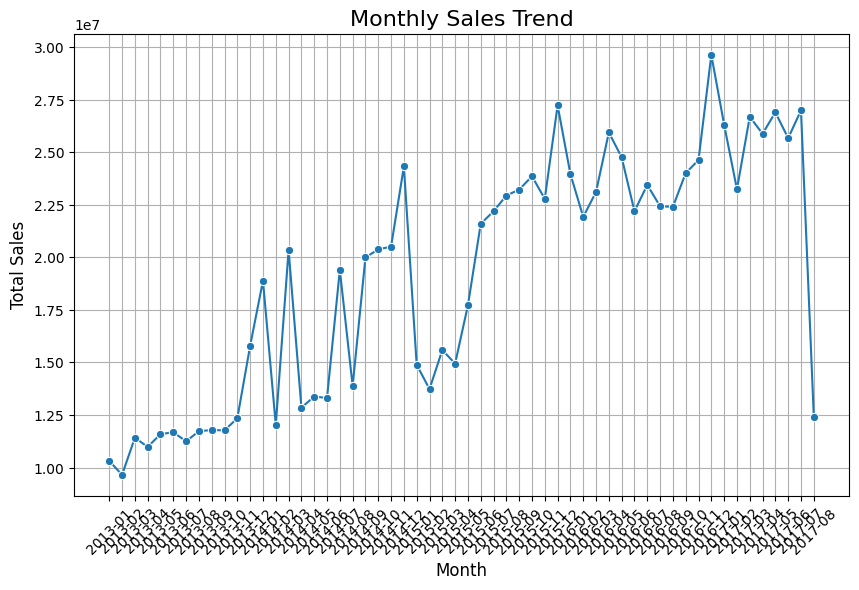

In [31]:
#Monthly Sales Trend
# Ensure 'date' is in datetime format
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M')  # Extract year-month

monthly_sales = df.groupby('month')['sales'].sum().reset_index()
monthly_sales['month'] = monthly_sales['month'].astype(str)

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='sales', data=monthly_sales, marker='o')
plt.xticks(rotation=45)
plt.title('Monthly Sales Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales', fontsize=12)
plt.grid()
plt.show()

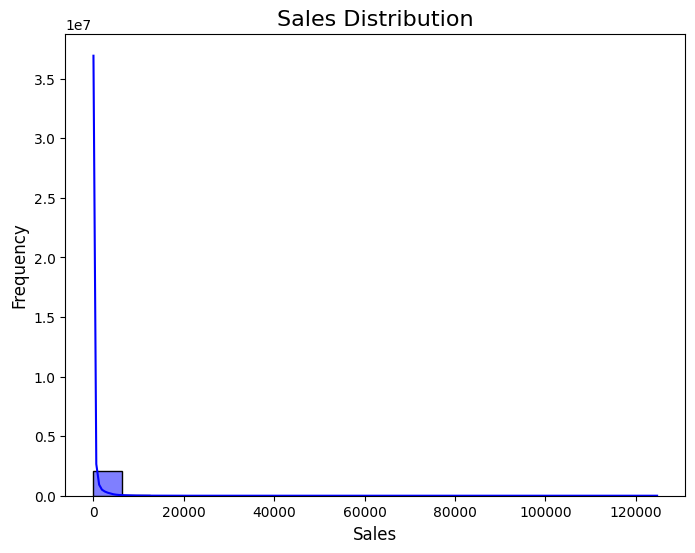

In [32]:
#Sales Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['sales'], kde=True, bins=20, color='blue')
plt.title('Sales Distribution', fontsize=16)
plt.xlabel('Sales', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Forecast Visualization (Simple Linear Regression)

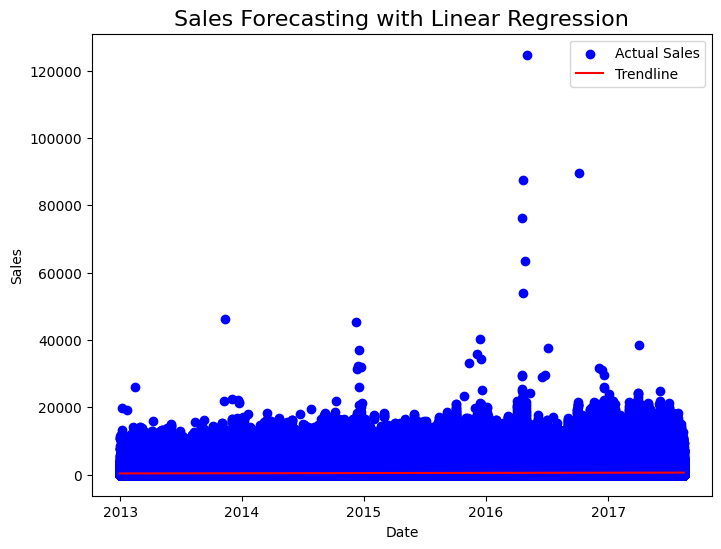

In [34]:
from sklearn.linear_model import LinearRegression
import numpy as np

df['timestamp'] = df['date'].map(pd.Timestamp.timestamp)  # Convert date to numeric
X = df[['timestamp']]
y = df['sales']

# Fit Linear Regression
model = LinearRegression()
model.fit(X, y)
df['sales_predicted'] = model.predict(X)

plt.figure(figsize=(8, 6))
plt.scatter(df['date'], df['sales'], color='blue', label='Actual Sales')
plt.plot(df['date'], df['sales_predicted'], color='red', label='Trendline')
plt.title('Sales Forecasting with Linear Regression', fontsize=16)
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(loc='upper right')
plt.show()

In [35]:
#Sales Forcasting with Linear Regression

x = df[['Month', 'Year', 'Day']]  #Independent variable
y = df['sales']  #Dependent variable

#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#Build and train the linear regression model
model=LinearRegression()
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Evaluate the model
mae=mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}, MSE: {mse}, R2: {r2}')

MAE: 666.0962607130724, MSE: 1648062.0610660594, R2: 0.0034739330345970876


# Future Sales Forecasting (Prediction)

In [37]:
#Example for prediction with new data (for next month, say Month = 12)

new_data = pd.DataFrame({'Month': [12], 'Year': [2024], 'Day': [15]})
future_sales = model.predict(new_data)
print("Prediction Sales:", future_sales)

Prediction Sales: [1038.08519457]
